In [8]:
import json
from matplotlib import pyplot as plt
import numpy as np
from model import Narx, DEVICE
from data import load_narx_data, load_data
from util_fun import narx_sim_nrms
import torch

In [9]:
pred_model=Narx(3+15,100,1).to(DEVICE)
sim_model=Narx(15+25,50,5).to(DEVICE)

In [10]:
pred_model.load_state_dict(torch.load(r'D:\Documents\TUe\MSC_AI-ES\5SC28-ML for Systems and Control\Project\narx15K_na3_nb15_nlay1_nnode100_pred'))
sim_model.load_state_dict(torch.load(r'D:\Documents\TUe\MSC_AI-ES\5SC28-ML for Systems and Control\Project\narx15K_na15_nb25_nlay5_nnode50_sim'))

<All keys matched successfully>

In [11]:
x, y=load_narx_data(3,15)
x=x.to(DEVICE)
y=y.to(DEVICE)
x_data, y_data=load_data()


In [12]:
x_data=x_data.to(DEVICE)
y_data=y_data.to(DEVICE)

In [13]:
y_pred=pred_model(x).detach().cpu().numpy()

In [14]:
x_data, y_data, y_sim,_ =narx_sim_nrms(sim_model,15,25,x_data[75000:],y_data[75000:], True,DEVICE)

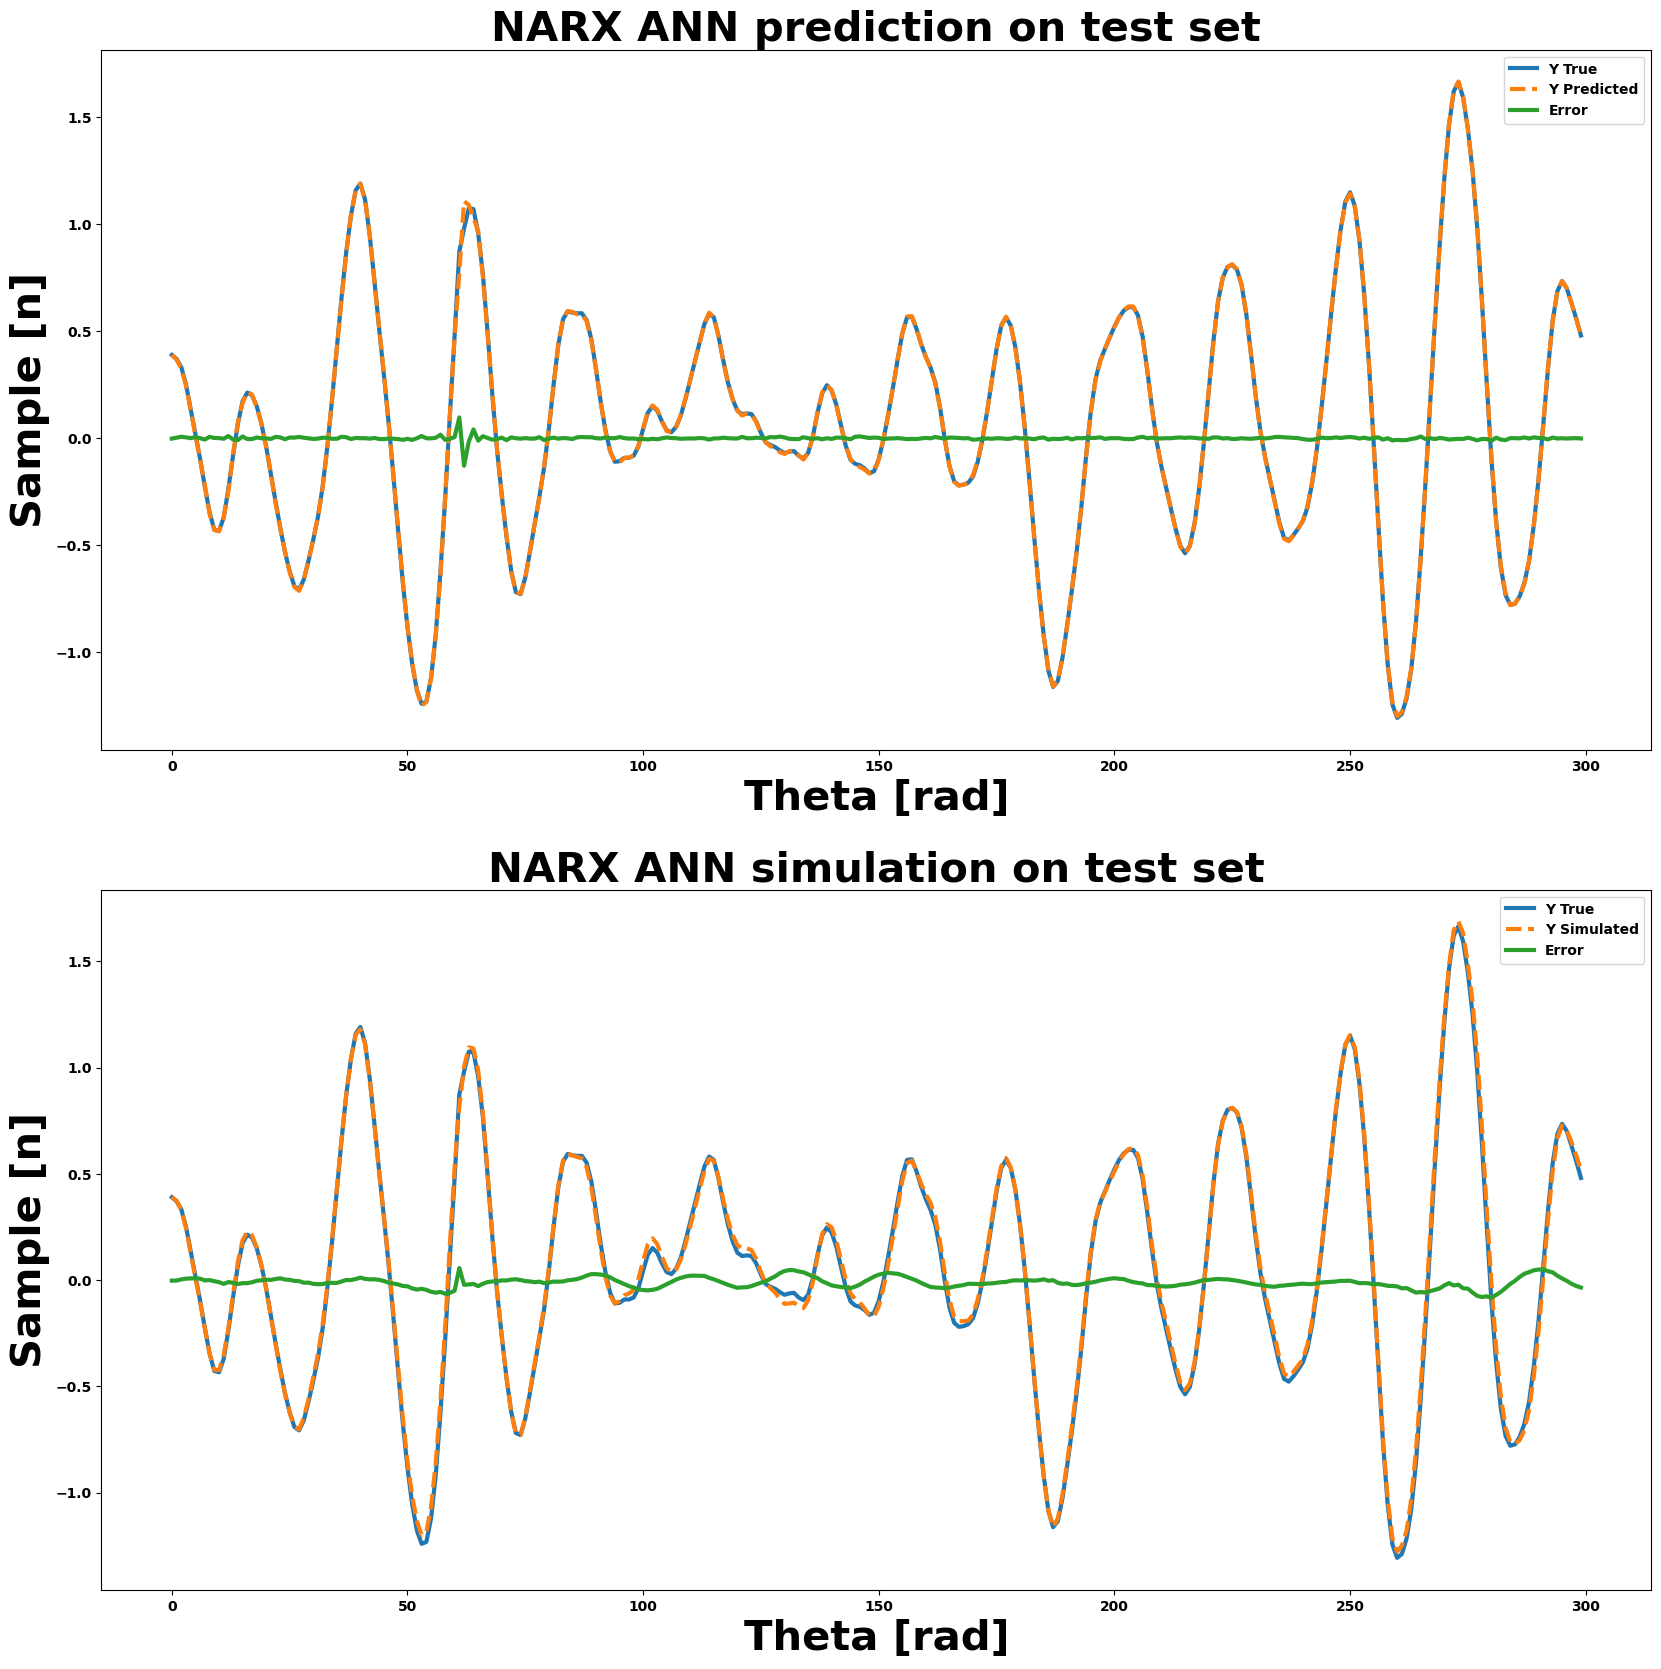

In [20]:
start=75000
end=start+300
fs=30
sim_pred_offset=10
fig = plt.figure(figsize=(20,20))
plt.subplot(211)
plt.title('NARX ANN prediction on test set', fontsize=fs)
plt.xlabel('Theta [rad]', fontsize=fs)
plt.ylabel('Sample [n]', fontsize=fs)
plt.plot(y.detach().cpu()[start+sim_pred_offset:end+sim_pred_offset],lw=3, label='Y True')
plt.plot(y_pred[start+sim_pred_offset:end+sim_pred_offset],ls='--',lw=3, label='Y Predicted')
plt.plot(y.detach().cpu()[start+sim_pred_offset:end+sim_pred_offset]-y_pred[start+sim_pred_offset:end+sim_pred_offset],lw=3, label='Error')
plt.legend()
plt.subplot(212)
plt.title('NARX ANN simulation on test set', fontsize=fs)
plt.xlabel('Theta [rad]', fontsize=fs)
plt.ylabel('Sample [n]', fontsize=fs)
plt.plot(y_data[0:300],lw=3, label='Y True')
plt.plot(y_sim[0:300],ls='--',lw=3, label='Y Simulated')
plt.plot(y_data[0:300]-y_sim[0:300],lw=3, label='Error')
plt.legend()
fig.patch.set_alpha(0)
plt.savefig('narx_pred_sim.png', bbox_inches='tight')